In [14]:
import pickle

In [15]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

In [17]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/pickles
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/pickles
1075.pkl           14189_3.pkl  14189_9.pkl         PDB1075.csv
1075_shuffled.csv  14189_4.pkl  14189_shuffled.csv  PDB14189_N.txt
14189_10.pkl       14189_5.pkl  186.pkl             PDB14189_P.txt
14189_11.pkl       14189_6.pkl  186_shuffled.csv    PDB2272_N.txt
14189_1.pkl        14189_7.pkl  2272_data.pkl       PDB2272_P.txt
14189_2.pkl        14189_8.pkl  2272_shuffled.csv   testData186.csv


In [18]:
#read in training data PDB14189 (post feature extraction)
#training data is divided into 11 pickle files, so we need to read them all in and concatenate them
X = []
for i in range(1, 12):
  filename = '14189_' + str(i) + '.pkl'
  with open(filename, 'rb') as f:
    X_train = pickle.load(f)
    X.append(X_train)
  f.close()
temp = X[0]
for i in range(1, len(X)):
  temp = np.concatenate((temp,X[i]), axis = 0)
X_train = temp

In [19]:
train_df = pd.read_csv('14189_shuffled.csv')
y_train = train_df["Class"]

In [20]:
#read in testing data PDB2272 (post feature extraction)
with open('2272_data.pkl', 'rb') as f:
  X_test = pickle.load(f)

test_df = pd.read_csv('2272_shuffled.csv')
y_test = test_df["Class"]
f.close()

In [21]:
# grid search -- time consuming, uncomment to run yourself
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# tuned_parameters = [
#     {"SVM__kernel": ["rbf","poly"], "SVM__gamma": ['scale','auto', 1e-1, 1e-2, 1e-3, 1e-4], "SVM__random_state":[42],"SVM__C": [0.1,1,10, 100, 100]}
# ]
# pipe = Pipeline([#('scaler',  StandardScaler()),
#             ('SVM', SVC())])
# print(pipe.get_params().keys())
# grid_search = GridSearchCV(
#     pipe, tuned_parameters, scoring='accuracy', refit=True, verbose=10
# )
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [22]:
clf = SVC(probability=True,kernel='rbf',gamma='scale',C=10, random_state = 0) # Platt calibration
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
y_pred = (y_prob[:,1] > 0.5).astype(int)
accuracy_score(y_pred,y_test)

0.8516725352112676

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUC: 0.9412450870286706


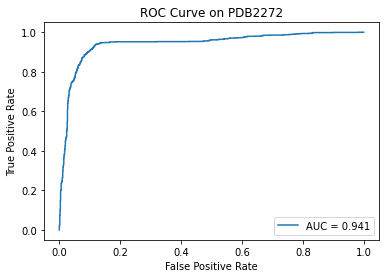

In [23]:
from google.colab import files

 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob[:,0], pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr, label = "AUC = 0.941")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on PDB2272")
plt.legend(loc="lower right")
plt.savefig("2272.png",dpi=500) 
files.download("2272.png")
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
##print(y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
mcc = matthews_corrcoef(y_test, y_pred)
print("specificity =",specificity)
print("sensitivity =",sensitivity)
print("MCC =",mcc)
#print(y_test)

specificity = 0.7390527256478999
sensitivity = 0.9609713790112749
MCC = 0.7196485114080808


# PDB1075 AND PDB186

In [25]:

filename = '1075.pkl'
with open(filename, 'rb') as f:
  X_train = pickle.load(f)


In [26]:
train_df = pd.read_csv('1075_shuffled.csv')
y_train = train_df["Class"]

In [27]:
with open('186.pkl', 'rb') as f:
  X_test = pickle.load(f)

test_df = pd.read_csv('186_shuffled.csv')
y_test = test_df["Class"]
f.close()

In [28]:
# grid search -- uncomment to run yourself
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# tuned_parameters = [
#     {"SVM__kernel": ["rbf","poly"], "SVM__gamma": ['scale','auto', 1e-1, 1e-2, 1e-3, 1e-4], "SVM__random_state":[42],"SVM__C": [0.1,1,10, 100, 100]}
# ]
# pipe = Pipeline([#('scaler',  StandardScaler()),
#             ('SVM', SVC())])
# print(pipe.get_params().keys())
# grid_search = GridSearchCV(
#     pipe, tuned_parameters, scoring='accuracy', refit=True, verbose=10
# )
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [29]:

svc = SVC(probability=True,kernel='rbf',gamma='scale',C=10,random_state=0) # Platt calibration
svc.fit(X_train, y_train)
y_prob = svc.predict_proba(X_test)
y_pred = (y_prob[:,1] > 0.5).astype(int)
acc = accuracy_score(y_pred,y_test)
acc

0.8172043010752689

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUC: 0.947508382471962


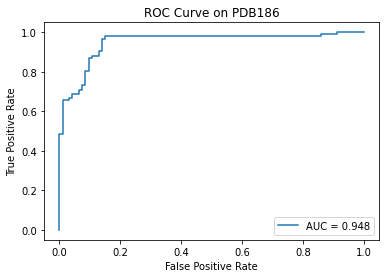

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob[:,0], pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr, label = "AUC = 0.948")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on PDB186")
plt.legend(loc="lower right")
plt.savefig("186.png",dpi=500) 
files.download("186.png")
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
mcc = matthews_corrcoef(y_test, y_pred)
print("specificity =",specificity)
print("sensitivity =",sensitivity)
print("MCC =",mcc)

specificity = 0.6989247311827957
sensitivity = 0.9354838709677419
MCC = 0.6529409655323366
